# Lecture 13

### binomial distribution
* roll a die, the chance of getting 6 is 1/6
* roll 100 dice, the chance of getting all sixes in $\frac{1}{6}^{100}$
    * the chance of getting no sixes at all is $\frac{5}{6}^{100}$

* roll 4 dice, what are the chances of getting exactly 2 sixes?
    * 66xx, 6x6x, 6xx6, x6x6, xx66, (where x stands for 1-5)
        * each of the above events has the probability $\frac{1}{6}^{2}\frac{5}{6}^{2}$
        * number of events above: choose 2 combinations from 4: $\frac{4!}{2!2!}$
        * $P=\frac{4!}{2!2!}*\frac{1}{6}^{2}\frac{5}{6}^{2}$
* probability of exactly 20 sixes out of 20 rolls?
    * possible positions for 20 sixes: choose 20 combination from 100:$\frac{100!}{20!80!}$
    * each of the events has the probability $\frac{1}{6}^{20}\frac{5}{6}^{80}$ 
    * $P=\frac{100!}{20!80!}*\frac{1}{6}^{20}\frac{5}{6}^{80}$

### binomial distribution pmf
* mean: np
* variance: np(1-p)

In [1]:
from math import factorial
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

0.24609375
0.24609375000000003


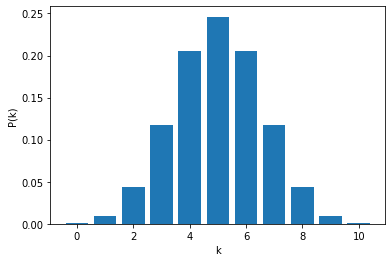

In [2]:
#flip a coin 10 times, what is the probability of seeing exactly 5 heads
def nchoosek(n,k):
    return factorial(n)/factorial(k)/factorial(n-k)
def binomPMF(k,n,p):
    return nchoosek(n,k)*p**k*(1-p)**(n-k)
print(binomPMF(5,10,0.5))

#possible to get same result without writing out your own function
print(stats.binom.pmf(5,10,0.5))
plt.bar(range(11),stats.binom.pmf(range(11),10,0.5))
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show()

0.623046875
0.6230468749999999


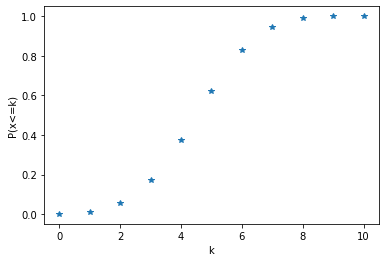

In [3]:
#flip a coin 10 time, what is the probability of seeing at least 5 heads
#use sum() function for "at least"
print(sum((binomPMF(i,10,0.5) for i in range(5,11))))
print(sum(stats.binom.pmf(range(5,11),10,0.5)))

plt.plot(range(11),np.cumsum(stats.binom.pmf(range(11),10,0.5)),'*')
plt.xlabel('k')
plt.ylabel('P(x<=k)')
plt.show()

### statistical hypothesis testing
* I give you a coin, which could be a “fair” coin or could be “loaded”
    * If you flip it, a fair coin gives head and tail with equal probability
    * In contrast, a loaded coin tends to give one side more frequently (either head or tail) than the other
    * Give you a coin, how do you know the coin is likely fair or loaded?
* Classical setup
    * H0 (null hypothesis): the coin is fair
    * H1 (alternative hypothesis): the coin is loaded (i.e., biased towards head or tail)
        * Usually, it is hard to argue how loaded it could be
    * Based on experimental results, can we determine that H0 is unlikely true and therefore reject it?

### fair or not fair?
* If you flip the coin 10 times, and observed 9 heads, how likely this is a fair coin?
* P-value: if the null hypothesis is true (coin is fair), how likely you can observe a result that is as unfair as the observed result?

In [4]:
#P(at least 9 heads or 9 tails | coin is fair)
#multiplied by 2 for the two test, 9 heads or 9 tails
print(2*(binomPMF(9, 10, 0.5) + binomPMF(10, 10, 0.5)))
#alternative way
2*sum([binomPMF(i, 10, 0.5) for i in range(9,11)])

0.021484375


0.021484375

* Typical level of acceptable p-value is 0.05 or 0.01
* We reject H0 if the probability is less than or equal to the p-value. This is strong evidence that the null hypothesis is invalid. Otherwise, we accept H0

### one-sided vs two-sided test
* H0: the coin is not biased toward head, i.e., p(head) <= 0.5
* H1: the coin is biased toward head, i.e. p(head) > 0.5
* Flip a coin 10 times, observed 9 heads
    * P(at least 9 heads | H0) <= P(at least 9 heads | coin is fair) = 0.01
* Two-sided and one-sided test need to be decided before the actual test
* Two-sided test is more common, as we are often interested in both positive and negative effects.

### t-test
* Used to test if the means from two groups are significantly different from each other

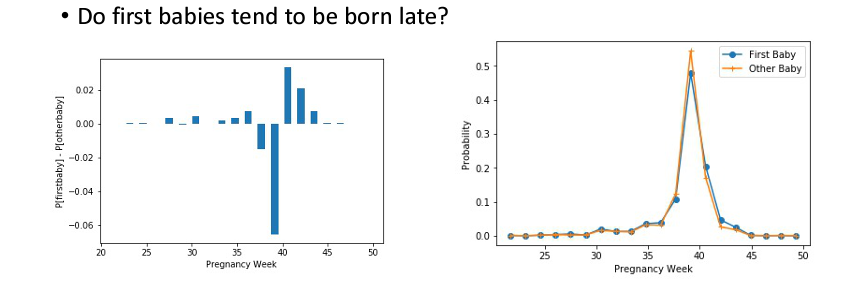

In [5]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\ttest1.png")


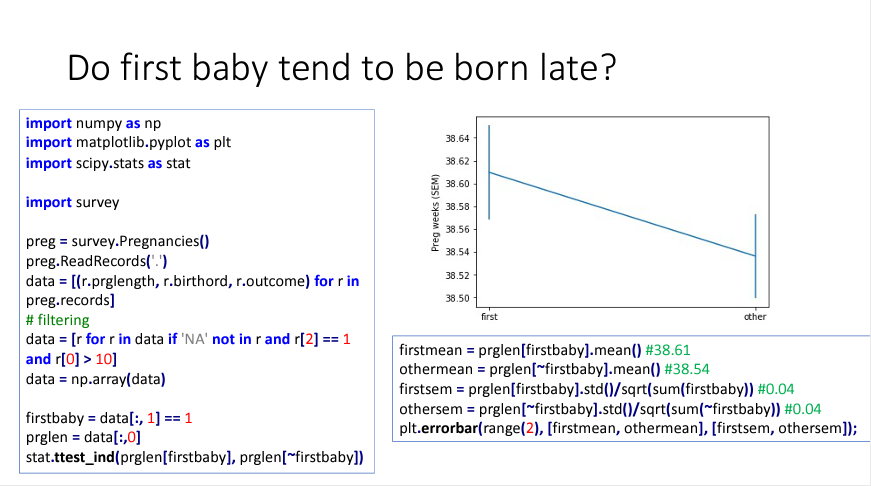

In [6]:

Image(filename=r"C:\Users\rmani\OneDrive\Pictures\ttest.png")

### multiple testing problem
* Give you a coin, without knowing fair or loaded, you can toss it for 10 times, and use the result to reasonably argue whether it is loaded
    * E.g. if you see 10 heads in a row, you can confidently reject H0 (coin is fair)
    * Because P(10H | fair coin) = 0.5**10 = 0.001
* Give you a box of 10**4 coins, without knowing if any of them might be loaded, you toss each one 10 times and observed some with 10 heads, some with 9 heads and so on
    * Can you say with confidence that those coins with 10 heads in a row are loaded?

### multiple testing problem
* If a coin is fair, toss it 10 times and observe 10 heads
    * P(10H | fair coin) = 0.5**10 = 0.001
* If all coins in the box of 10**4 coins are fair coins, toss each one 10 times, how many coins might give you 10 heads in a row
    * Each fair coin has 0.001 chance to be tested positive (10 heads in a row)
    * The number of coins to be tested positive is also a binomial distribution with n = 10**4 and p = 0.001
    * Expectation is np = 10

### multiple testing problem
* conclusion
    1) The individual p-value does not support whether a selected coin in the box is loaded
        * more stringent p-values (or corrections of p-values) needed
    2) If you toss each coin 10 times, you will not have sufficient statistical power to detect loaded coins from a box of 10**4 coins, even if some are loaded
        * more experiments are needed